<div style="background-color:#e6f2ff; padding:15px; border-radius:8px;">
  <h1>⚡ Global Energy Consumption — Analysis by Continent and Income Level (1965–2026)</h1>
  <p>This notebook explores the evolution of <strong>primary energy consumption per capita</strong> across continents and income groups from 1965 to 2026, using data from 
  <a href="https://ourworldindata.org/">Our World in Data</a>. The dataset provides historical and aggregated insights into global energy usage patterns, enabling comparative analysis and forecasting.</p>

  <h2>📁 Dataset Overview</h2>
  <p>We use the <strong>Per Capita Energy Use Dataset</strong>, which includes annual measurements of energy consumption (in kWh per capita) for individual countries, continents, and income-level aggregates.</p>

  <h2>📌 Key Objectives</h2>
  <ul>
    <li>🗺️ Visualize energy consumption by continent using choropleth maps.</li>
    <li>📈 Compare long-term trends across income groups: high, upper-middle, lower-middle, and low-income countries.</li>
    <li>🔮 Apply predictive modeling to estimate energy consumption for 2025 and 2026.</li>
  </ul>

  <blockquote>This analysis aims to highlight global disparities in energy access and usage, supporting informed discussions on sustainability and development.</blockquote>
</div>

<div style="background-color:#e6ffe6; padding:15px; border-radius:8px;">
  <h1>⚡ Consumo Energético Global — Análisis por Continente y Nivel de Ingreso (1965–2026)</h1>
  <p>Este notebook analiza la evolución del <strong>consumo primario de energía per cápita</strong> en continentes y grupos económicos desde 1965 hasta 2026, utilizando datos de 
  <a href="https://ourworldindata.org/">Our World in Data</a>. El conjunto de datos ofrece información histórica y agregada sobre los patrones de uso energético a nivel global, permitiendo comparaciones y proyecciones.</p>

  <h2>📁 Conjunto de datos</h2>
  <p>Se utiliza el <strong>Dataset de Consumo de Energía per Cápita</strong>, que incluye mediciones anuales de consumo energético (en kWh per cápita) para países individuales, continentes y agregados por nivel de ingreso.</p>

  <h2>📌 Objetivos clave</h2>
  <ul>
    <li>🗺️ Visualizar el consumo energético por continente mediante mapas coropléticos.</li>
    <li>📈 Comparar tendencias históricas entre grupos de ingreso: países de altos, medios-altos, medios-bajos y bajos ingresos.</li>
    <li>🔮 Aplicar modelos predictivos para estimar el consumo energético en 2025 y 2026.</li>
  </ul>

  <blockquote>Este análisis busca resaltar las desigualdades globales en el acceso y uso de energía, apoyando discusiones informadas sobre sostenibilidad y desarrollo.</blockquote>
</div>

<div style="background-color:#d9d9d9; padding:15px; border-radius:8px;">
  <h2>📥 Carga y exploración inicial del dataset / Dataset loading and initial exploration</h2>
  
  <p>Se importan las librerías necesarias para el análisis energético global y se carga el dataset desde <a href="https://ourworldindata.org/">Our World in Data</a>.  
  Se realiza una exploración preliminar para identificar las entidades disponibles, filtrar los datos del año 2024 y detectar qué entidades no tienen información para ese año.  
  <em>Objetivo:</em> Comprender la estructura del dataset y definir qué entidades serán útiles para el análisis visual y predictivo.</p>
  
  <p>The required libraries for global energy analysis are imported, and the dataset is loaded from <a href="https://ourworldindata.org/">Our World in Data</a>.  
  A preliminary exploration is performed to identify available entities, filter data for the year 2024, and detect which entities lack information for that year.  
  <em>Objective:</em> Understand the dataset structure and determine which entities are suitable for visual and predictive analysis.</p>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
url = 'https://ourworldindata.org/grapher/per-capita-energy-use.csv?v=1&csvType=full&useColumnShortNames=true'
dataset = pd.read_csv(url)
dataset.head()

,Entity,Code,Year,primary_energy_consumption_per_capita__kwh
0,Afghanistan,AFG,1980,481.20862
1,Afghanistan,AFG,1981,610.63900
2,Afghanistan,AFG,1982,717.76640
3,Afghanistan,AFG,1983,905.12665
4,Afghanistan,AFG,1984,887.37100


In [3]:
# Ver entidades únicas
print("Total de entidades:", dataset["Entity"].nunique())
print("Ejemplo de entidades:", dataset["Entity"].unique()[:20])

Total de entidades: 236
Ejemplo de entidades: ['Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Asia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium']


In [4]:
# Filtrar datos de 2024
data_2024 = dataset[dataset["Year"] == 2024].copy()
# Detectar entidades sin datos en 2024
entidades_sin_2024 = set(dataset["Entity"].unique()) - set(data_2024["Entity"].unique())
print("\nEntidades sin información en 2024:")
print(sorted(entidades_sin_2024))


Entidades sin información en 2024:
['Afghanistan', 'Albania', 'American Samoa', 'Angola', 'Antigua and Barbuda', 'Armenia', 'Aruba', 'Bahamas', 'Bahrain', 'Barbados', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'British Virgin Islands', 'Brunei', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Cuba', 'Czechoslovakia', 'Democratic Republic of Congo', 'Djibouti', 'Dominica', 'Dominican Republic', 'East Germany', 'East Timor', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Falkland Islands', 'Faroe Islands', 'Fiji', 'French Guiana', 'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Jordan', 'Kenya', 'Kiribati', 'Kosovo', 'Kyrgyzstan', 'Laos', 'Leb

<div style="background-color:#d9d9d9; padding:15px; border-radius:8px;">
  <h2>📊 Preparación de datasets / Dataset preparation</h2>
  
  <p>Se organiza la información en tres subconjuntos para facilitar el análisis:  
  - <strong>Países</strong>: entidades con código ISO válido, útiles para mapas detallados.  
  - <strong>Continentes</strong>: Africa, Asia, Europe, North America, Oceania y South America, con datos completos para 2024.  
  - <strong>Grupos económicos</strong>: High-income, Upper-middle-income, Lower-middle-income y Low-income countries, que permiten comparar tendencias históricas por nivel de ingreso.  
  <em>Objetivo:</em> Separar los datos en categorías claras que soporten tanto visualizaciones geográficas como comparaciones socioeconómicas.</p>
  
  <p>The dataset is organized into three subsets to streamline analysis:  
  - <strong>Countries</strong>: entities with valid ISO codes, suitable for detailed mapping.  
  - <strong>Continents</strong>: Africa, Asia, Europe, North America, Oceania, and South America, with complete data for 2024.  
  - <strong>Economic groups</strong>: High-income, Upper-middle-income, Lower-middle-income, and Low-income countries, enabling historical trend comparisons by income level.  
  <em>Objective:</em> Separate the data into clear categories supporting both geographic visualizations and socioeconomic comparisons.</p>
</div>

In [5]:
# Separar países vs grupos agregados
dataset_paises = dataset[dataset["Code"].notna()].copy()
dataset_grupos = dataset[dataset["Code"].isna()].copy()

print("\nEjemplo de países (con ISO):", dataset_paises["Entity"].unique()[:10])
print("Ejemplo de grupos/continentes (sin ISO):", dataset_grupos["Entity"].unique()[:10])


Ejemplo de países (con ISO): ['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia']
Ejemplo de grupos/continentes (sin ISO): ['Africa' 'Asia' 'Europe' 'European Union (27)' 'High-income countries'
 'Low-income countries' 'Lower-middle-income countries' 'North America'
 'Oceania' 'South America']


In [6]:
# ============================
# Dataset de continentes
# ============================
continentes = ["Africa", "Asia", "Europe", "North America", "Oceania", "South America"]

dataset_continentes = dataset[
    dataset["Entity"].isin(continentes)
].copy()

print("Dataset continentes listo:")
print(dataset_continentes.head())

# ============================
# Dataset de grupos económicos
# ============================
grupos_economicos = [
    "High-income countries",
    "Low-income countries",
    "Lower-middle-income countries",
    "Upper-middle-income countries"
]

dataset_grupos = dataset[
    dataset["Entity"].isin(grupos_economicos)
].copy()

print("\nDataset grupos económicos listo:")
print(dataset_grupos.head())

Dataset continentes listo:
    Entity Code  Year  primary_energy_consumption_per_capita__kwh
44  Africa  NaN  1965                                   2228.1287
45  Africa  NaN  1966                                   2275.2998
46  Africa  NaN  1967                                   2240.6990
47  Africa  NaN  1968                                   2306.2280
48  Africa  NaN  1969                                   2308.4624

Dataset grupos económicos listo:
                     Entity Code  Year  \
4274  High-income countries  NaN  1965   
4275  High-income countries  NaN  1966   
4276  High-income countries  NaN  1967   
4277  High-income countries  NaN  1968   
4278  High-income countries  NaN  1969   

      primary_energy_consumption_per_capita__kwh  
4274                                   32075.068  
4275                                   33339.000  
4276                                   34351.496  
4277                                   36248.086  
4278                               

<div style="background-color:#d9d9d9; padding:15px; border-radius:8px;">
  <h2>📉 Visualización de consumo energético / Energy consumption visualization</h2>
  
  <p>Se generan tres visualizaciones principales para comprender el consumo energético global:  
  - <strong>Mapa coroplético por continente (2024)</strong>: se cargan las geometrías de países, se disuelven por continente y se unen con los datos de consumo per cápita. El resultado muestra diferencias regionales en el acceso y uso de energía.  
  - <strong>Gráfico de líneas por grupos económicos (1965–2024)</strong>: se comparan las tendencias históricas de consumo per cápita entre países de altos, medios-altos, medios-bajos y bajos ingresos.  
  - <strong>Gráfico de predicción por continente (2025–2026)</strong>: se aplica un modelo de regresión lineal para estimar el consumo futuro. Las líneas muestran la evolución histórica y los puntos resaltan las proyecciones en un fondo amarillo.  
  <em>Objetivo:</em> Visualizar patrones geográficos, socioeconómicos y proyectados del consumo energético per cápita.</p>
  
  <p>Three main visualizations are generated to understand global energy consumption:  
  - <strong>Choropleth map by continent (2024)</strong>: country geometries are loaded, dissolved by continent, and merged with per capita consumption data. The result highlights regional differences in energy access and usage.  
  - <strong>Line chart by economic groups (1965–2024)</strong>: historical trends in per capita consumption are compared across high, upper-middle, lower-middle, and low-income countries.  
  - <strong>Prediction line chart by continent (2025–2026)</strong>: a linear regression model is applied to estimate future consumption. Lines show historical evolution, while points highlight projections on a yellow background.  
  <em>Objective:</em> Visualize geographic, socioeconomic, and projected patterns of per capita energy consumption.</p>
</div>

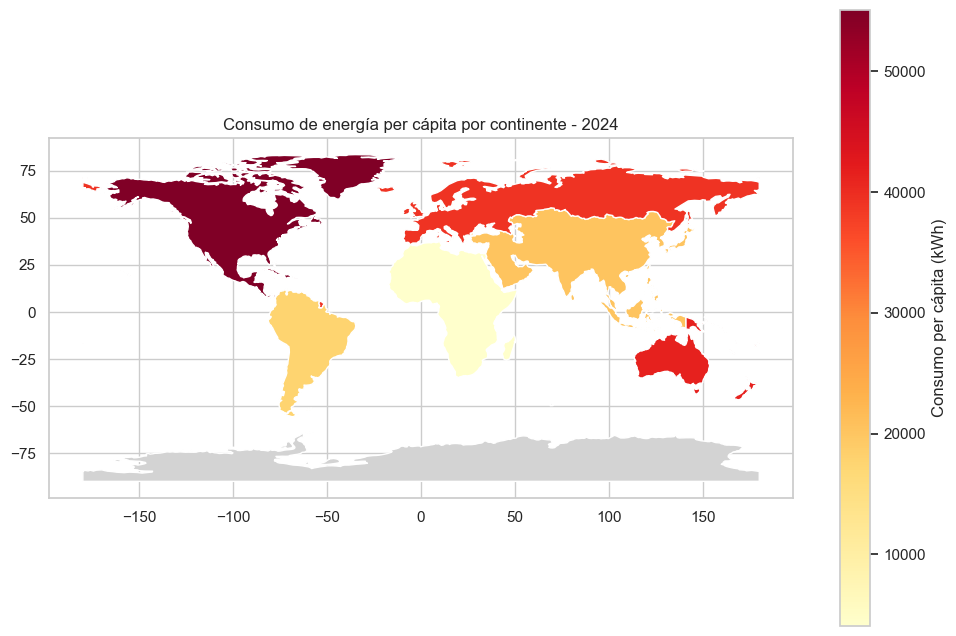

In [12]:
# Cargar shapefile de países
world = gpd.read_file(
    "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
)

# Disolver geometrías por continente
continents_geom = world.dissolve(by="CONTINENT")

# Filtrar datos de 2024 para continentes
data_cont_2024 = dataset_continentes[dataset_continentes["Year"] == 2024]

# Unir geometrías con datos
continents_map = continents_geom.merge(
    data_cont_2024, left_on="CONTINENT", right_on="Entity", how="left"
)

# Graficar
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
continents_map.plot(
    column="primary_energy_consumption_per_capita__kwh",
    ax=ax,
    legend=True,
    cmap="YlOrRd",
    legend_kwds={"label": "Consumo per cápita (kWh)"},
    missing_kwds={"color": "lightgrey"}
)
plt.title("Consumo de energía per cápita por continente - 2024")
plt.savefig("../images/mapa_continentes_2024.png", dpi=300, bbox_inches="tight")
plt.show()

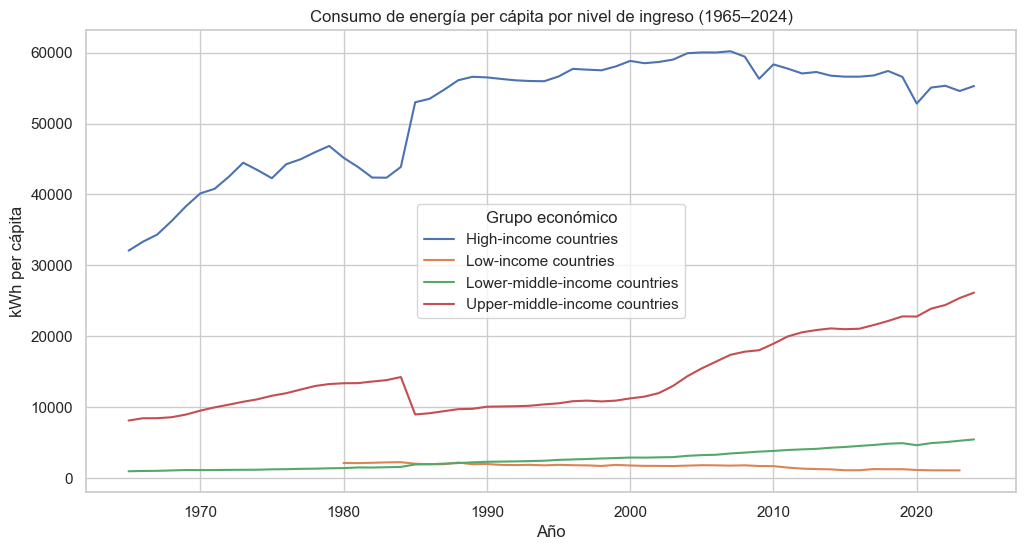

In [11]:
# Filtrar datos de grupos económicos
data_grupos = dataset_grupos[
    dataset_grupos["Entity"].isin([
        "High-income countries",
        "Low-income countries",
        "Lower-middle-income countries",
        "Upper-middle-income countries"
    ])
]

# Gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=data_grupos,
    x="Year",
    y="primary_energy_consumption_per_capita__kwh",
    hue="Entity"
)
plt.title("Consumo de energía per cápita por nivel de ingreso (1965–2024)")
plt.ylabel("kWh per cápita")
plt.xlabel("Año")
plt.legend(title="Grupo económico")
plt.savefig("../images/lineas_grupos_economicos.png", dpi=300, bbox_inches="tight")
plt.show()

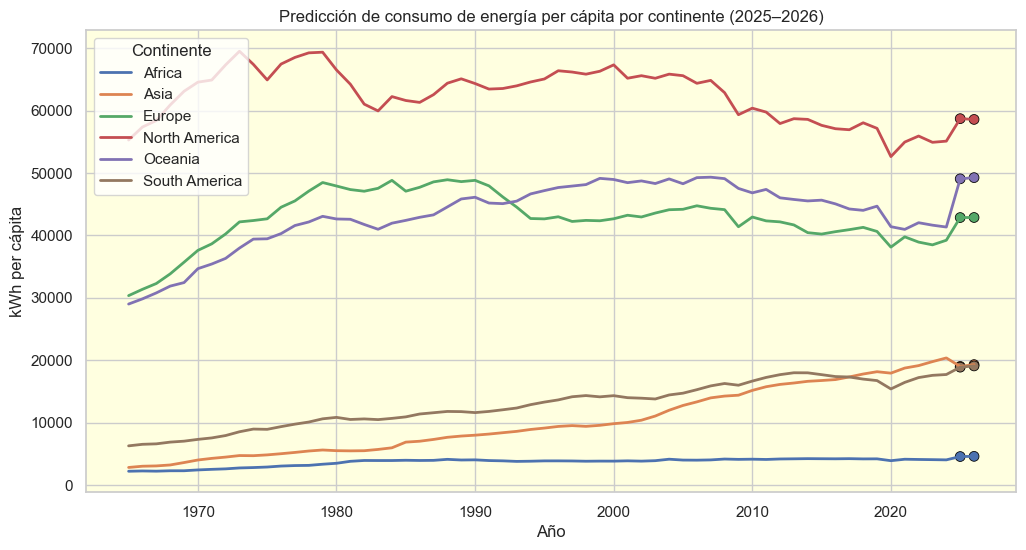

In [10]:
# Filtrar continentes
continentes = ["Africa", "Asia", "Europe", "North America", "Oceania", "South America"]
data_cont = dataset[dataset["Entity"].isin(continentes)].copy()

# Crear DataFrame para predicciones
predicciones = []

for cont in continentes:
    df = data_cont[data_cont["Entity"] == cont]
    X = df[["Year"]]
    y = df["primary_energy_consumption_per_capita__kwh"]

    # Modelo de regresión lineal
    model = LinearRegression()
    model.fit(X, y)

    # Predecir 2025 y 2026 (usando DataFrame para evitar warning)
    for year in [2025, 2026]:
        y_pred = model.predict(pd.DataFrame({"Year":[year]}))[0]
        predicciones.append({"Entity": cont, "Year": year,
                             "primary_energy_consumption_per_capita__kwh": y_pred})

# Convertir predicciones a DataFrame
df_pred = pd.DataFrame(predicciones)

# Combinar con datos originales
data_all = pd.concat([data_cont, df_pred])

# ============================
# Gráfico de líneas moderno
# ============================
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# Fondo amarillo
plt.gca().set_facecolor("lightyellow")

# Dibujar líneas sin marcadores
sns.lineplot(
    data=data_all,
    x="Year",
    y="primary_energy_consumption_per_capita__kwh",
    hue="Entity",
    linewidth=2
)

# Añadir puntos SOLO en 2025 y 2026 con tamaño más pequeño
sns.scatterplot(
    data=df_pred,
    x="Year",
    y="primary_energy_consumption_per_capita__kwh",
    hue="Entity",
    s=50,   # tamaño más pequeño de los puntos
    marker="o",
    edgecolor="black",
    legend=False  # evita duplicar leyenda
)

plt.title("Predicción de consumo de energía per cápita por continente (2025–2026)")
plt.ylabel("kWh per cápita")
plt.xlabel("Año")
plt.legend(title="Continente")
plt.savefig("../images/prediccion_consumo_energia.png", dpi=300, bbox_inches="tight")
plt.show()


<div style="background-color: #e6f2ff; padding: 25px; border-radius: 12px; font-family: 'Segoe UI', sans-serif; color: #333; line-height: 1.6;">

<h2 style="color: #0d47a1;">🧩 <strong>Conclusions — Global Energy Consumption Trends</strong></h2>

<h3 style="color: #1565c0;">🗺️ Continental Patterns (2024)</h3>
<ul>
  <li><strong>North America</strong> and <strong>Europe</strong> show the highest per capita energy consumption, exceeding 40,000 kWh.</li>
  <li><strong>Oceania</strong> also displays high levels, comparable to Europe.</li>
  <li><strong>Asia</strong> and <strong>South America</strong> present moderate consumption, with steady growth over time.</li>
  <li><strong>Africa</strong> remains the lowest, highlighting persistent disparities in energy access.</li>
</ul>

<h3 style="color: #1565c0;">📈 Economic Groups (1965–2024)</h3>
<ul>
  <li><strong>High-income countries</strong> consistently lead, with consumption far above other groups.</li>
  <li><strong>Upper-middle-income countries</strong> show significant growth since the 1990s, narrowing the gap with high-income nations.</li>
  <li><strong>Lower-middle-income countries</strong> display gradual increases, reflecting industrialization and development.</li>
  <li><strong>Low-income countries</strong> remain at minimal levels, evidencing structural inequalities in energy use.</li>
</ul>

<h3 style="color: #1565c0;">🔮 Predictions (2025–2026)</h3>
<ul>
  <li>Regression forecasts indicate <strong>continued growth</strong> in Asia and South America.</li>
  <li><strong>North America</strong> and <strong>Europe</strong> remain stable at high levels, with slight increases.</li>
  <li><strong>Africa</strong> shows only marginal growth, reinforcing global inequality in energy consumption.</li>
</ul>

<h3 style="color: #1565c0;">⚠️ About Data Interpretation</h3>
<p>The projections are based on linear regression models, which capture historical trends but do not account for disruptive events such as technological breakthroughs, policy changes, or global crises. They provide a baseline scenario for comparative analysis.</p>

<blockquote>These findings reveal persistent global disparities: while high-income regions maintain elevated consumption, emerging economies are catching up, and low-income regions remain far behind. The challenge lies in balancing growth with sustainability and equity.</blockquote>
</div>

<div style="background-color: #e6ffe6; padding: 25px; border-radius: 12px; font-family: 'Segoe UI', sans-serif; color: #333; line-height: 1.6;">

<h2 style="color: #0d47a1;">🧩 <strong>Conclusiones — Tendencias Globales de Consumo Energético</strong></h2>

<h3 style="color: #1565c0;">🗺️ Patrones Continentales (2024)</h3>
<ul>
  <li><strong>América del Norte</strong> y <strong>Europa</strong> presentan los niveles más altos de consumo per cápita, superando los 40,000 kWh.</li>
  <li><strong>Oceanía</strong> también muestra valores elevados, similares a Europa.</li>
  <li><strong>Asia</strong> y <strong>Sudamérica</strong> reflejan consumos moderados, con crecimiento sostenido en el tiempo.</li>
  <li><strong>África</strong> se mantiene en los niveles más bajos, evidenciando desigualdades persistentes en el acceso a energía.</li>
</ul>

<h3 style="color: #1565c0;">📈 Grupos Económicos (1965–2024)</h3>
<ul>
  <li>Los <strong>países de altos ingresos</strong> lideran consistentemente, con consumos muy superiores al resto.</li>
  <li>Los <strong>países de ingresos medios-altos</strong> muestran un crecimiento notable desde los años 90, reduciendo la brecha con los de altos ingresos.</li>
  <li>Los <strong>países de ingresos medios-bajos</strong> presentan incrementos graduales, reflejo de procesos de industrialización.</li>
  <li>Los <strong>países de bajos ingresos</strong> permanecen en niveles mínimos, lo que evidencia desigualdades estructurales en el uso de energía.</li>
</ul>

<h3 style="color: #1565c0;">🔮 Predicciones (2025–2026)</h3>
<ul>
  <li>Las proyecciones por regresión indican <strong>crecimiento continuo</strong> en Asia y Sudamérica.</li>
  <li><strong>América del Norte</strong> y <strong>Europa</strong> se mantienen estables en niveles altos, con ligeros aumentos.</li>
  <li><strong>África</strong> muestra un crecimiento marginal, reforzando la desigualdad global en consumo energético.</li>
</ul>

<h3 style="color: #1565c0;">⚠️ Sobre la Interpretación de Datos</h3>
<p>Las proyecciones se basan en modelos de regresión lineal, que capturan tendencias históricas pero no consideran eventos disruptivos como avances tecnológicos, cambios de política o crisis globales. Representan un escenario base para el análisis comparativo.</p>

<blockquote>Estos hallazgos revelan desigualdades persistentes: mientras las regiones de altos ingresos mantienen consumos elevados, las economías emergentes avanzan, y las de bajos ingresos permanecen rezagadas. El reto es equilibrar crecimiento con sostenibilidad y equidad.</blockquote>
</div>